In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.titlesize'] = 18

In [58]:
winners = pd.read_csv('windelta.csv', delimiter='|')
winners['inserted_at'] = pd.to_datetime(winners['inserted_at'], format="%Y-%m-%d %H:%M:%S.%f")
winners.head()

,inserted_at,slot,value,hash
0,2023-02-24 15:50:23.680712,5869150,75454354173452880,0x9b3af2
1,2023-02-24 15:51:23.686856,5869155,138807147878308192,0x03d09f
2,2023-02-24 15:53:00.487982,5869163,50874348025890567,0xbf9969
3,2023-02-24 15:53:23.687311,5869165,39920149754212144,0x6ca72f
4,2023-02-24 15:55:24.006246,5869175,52699372202476983,0x56cc15


In [126]:
winners['slot_boundary'] = np.asarray([pd.Timestamp(x).round(freq='12S') for x in winners['inserted_at'].values])
winners['deltas_us'] = [int((winners['slot_boundary'].values[i] - winners['inserted_at'].values[i]) / np.timedelta64(1, 'us')) for i in range(len(winners))]
winners.head()

,inserted_at,slot,value,hash,slot_boundary,deltas_us
0,2023-02-24 15:50:23.680712,5869150,75454354173452880,0x9b3af2,2023-02-24 15:50:24,319288
1,2023-02-24 15:51:23.686856,5869155,138807147878308192,0x03d09f,2023-02-24 15:51:24,313144
2,2023-02-24 15:53:00.487982,5869163,50874348025890567,0xbf9969,2023-02-24 15:53:00,-487982
3,2023-02-24 15:53:23.687311,5869165,39920149754212144,0x6ca72f,2023-02-24 15:53:24,312689
4,2023-02-24 15:55:24.006246,5869175,52699372202476983,0x56cc15,2023-02-24 15:55:24,-6246


In [62]:
# write file for winning hash and slots
f = open('winninghashslots.txt', 'w')
slots = winners['slot'].values
hashes = winners['hash'].values
for i in range(len(slots)):
    f.write('{} {}\n'.format(slots[i], hashes[i]))
f.close()

No handles with labels found to put in legend.


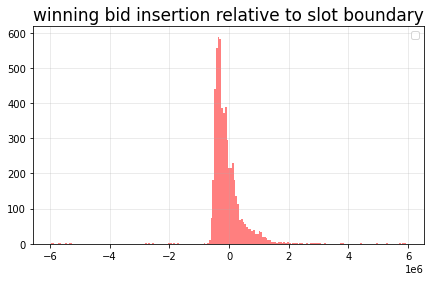

In [127]:
f, ax = plt.subplots(figsize=(7,4))
ax.hist(-winners['deltas_us'].values, bins=200, color='r', alpha=0.5)
ax.set_title('winning bid insertion relative to slot boundary', size=17)
ax.legend()
plt.show()

In [64]:
winners[winners['slot']==5869150]

,inserted_at,slot,value,hash,slot_boundary,deltas_us
0,2023-02-24 15:50:23.680712,5869150,75454354173452880,0x9b3af2,2023-02-24 15:50:24,319288


In [ ]:
# query 1:
 5869150 | 75454354173452880 | 0x9b3af2 | 2023-02-24 15:50:22.90846 | 2023-02-24 15:50:22.813963
# query 2:
 5869150 | 84917981546849292 | 0xf4e541 | 2023-02-24 15:50:23.759636 | 2023-02-24 15:50:23.659157

In [ ]:
1. winning block submitted at 15:50:22.90846
2. getPayload delivered at    15:50:23.680712
3. highest block submitted at 15:50:23.759636

In [67]:
winsubs = pd.read_csv('windelta1_res.txt', delimiter='|', names=['slot', 'value', 'hash', 'inserted_at', 'received_at'])
winsubs['inserted_at'] = pd.to_datetime(winsubs['inserted_at'], format="%Y-%m-%d %H:%M:%S.%f")
winsubs['received_at'] = pd.to_datetime(winsubs['received_at'], format="%Y-%m-%d %H:%M:%S.%f")
winsubs.head()

,slot,value,hash,inserted_at,received_at
0,5869150,75454354173452880,0x9b3af2,2023-02-24 15:50:22.908460,2023-02-24 15:50:22.813963
1,5869155,138807147878308192,0x03d09f,2023-02-24 15:51:23.445101,2023-02-24 15:51:23.168851
2,5869163,50874348025890567,0xbf9969,2023-02-24 15:52:59.260797,2023-02-24 15:52:58.900823
3,5869165,39920149754212144,0x6ca72f,2023-02-24 15:53:23.278979,2023-02-24 15:53:23.167940
4,5869175,52699372202476983,0x56cc15,2023-02-24 15:55:23.300688,2023-02-24 15:55:23.116930


In [68]:
highsubs = pd.read_csv('windelta2_res.txt', delimiter='|', names=['slot', 'value', 'hash', 'inserted_at', 'received_at'])
highsubs['inserted_at'] = pd.to_datetime(highsubs['inserted_at'], format="%Y-%m-%d %H:%M:%S.%f")
highsubs['received_at'] = pd.to_datetime(highsubs['received_at'], format="%Y-%m-%d %H:%M:%S.%f")
highsubs.head()

,slot,value,hash,inserted_at,received_at
0,5869150,84917981546849292,0xf4e541,2023-02-24 15:50:23.759636,2023-02-24 15:50:23.659157
1,5869155,138807147878308192,0x03d09f,2023-02-24 15:51:23.445101,2023-02-24 15:51:23.168851
2,5869163,50884848025890567,0x800744,2023-02-24 15:53:00.359119,2023-02-24 15:52:59.381302
3,5869165,40650663479468494,0x49bdca,2023-02-24 15:53:23.602052,2023-02-24 15:53:23.460386
4,5869175,103240680963313264,0xe1fbe7,2023-02-24 15:55:24.174456,2023-02-24 15:55:23.953573


In [70]:
len(winsubs), len(highsubs)

(5723, 5723, 5723)

In [79]:
delta1 = (highsubs['inserted_at'].values - winsubs['inserted_at'].values)/np.timedelta64(1, 'us')
delta1

array([ 851176.,       0., 1098322., ...,  467694.,  694876.,  537803.])

In [93]:
delta2 = (highsubs['inserted_at'].values - winners['inserted_at'].values)/np.timedelta64(1, 'us')
delta2

array([  78924., -241755., -128863., ...,  243628.,  317187., 1024858.])

In [94]:
delta3 = (winners['inserted_at'].values - winsubs['inserted_at'].values)/np.timedelta64(1, 'us')
delta3

array([ 772252.,  241755., 1227185., ...,  224066.,  377689., -487055.])

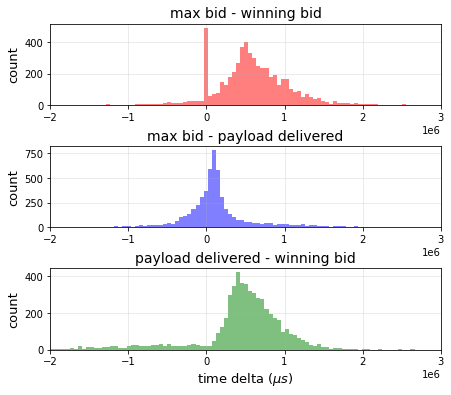

In [125]:
f, axarr = plt.subplots(nrows=3, figsize=(7,6))
cts, bins = np.histogram(delta1[np.where((delta1 >= int(-2e6)) | (delta1 <= int(3e6)))], bins=500)
axarr[0].hist(delta1[np.where((delta1 >= int(-2e6)) | (delta1 <= int(3e6)))], bins=bins, color='r', alpha=0.5)
axarr[1].hist(delta2[np.where((delta2 >= int(-2e6)) | (delta2 <= int(3e6)))], bins=bins, color='b', alpha=0.5)
axarr[2].hist(delta3[np.where((delta3 >= int(-2e6)) | (delta3 <= int(3e6)))], bins=bins, color='g', alpha=0.5)
# ax.set_title('winning bid insertion relative to slot boundary', size=17)
# ax.legend()
for ax in axarr:
    ax.set_xlim(int(-2e6), int(3e6))
    ticks = [int(-2e6),int(-1e6),int(0),int(1e6),int(2e6),int(3e6)]
    ax.set_xticks(ticks)
    ax.set_ylabel('count', size=13)
# for ax in axarr[:-1]:
#     ax.set_xticklabels([])
axarr[-1].set_xlabel('time delta $(\mu s)$', size=13)
axarr[0].set_title('max bid - winning bid', size=14)
axarr[1].set_title('max bid - payload delivered', size=14)
axarr[2].set_title('payload delivered - winning bid', size=14)
plt.subplots_adjust(hspace=0.5)
plt.show()

In [138]:
subdelta1 = (highsubs['inserted_at'] - highsubs['received_at'])/np.timedelta64(1, 'us')
subdelta2 = (winsubs['inserted_at'] - winsubs['received_at'])/np.timedelta64(1, 'us')
subdelta1.mean(), subdelta2.mean()

(481132.2184169142, 505281.0426349816)

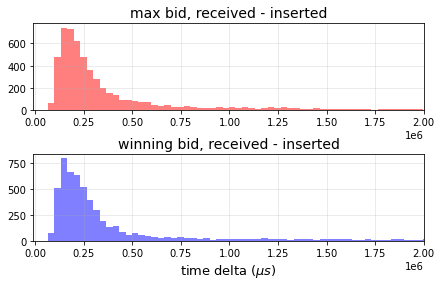

In [139]:
f, axarr = plt.subplots(nrows=2, figsize=(7,4))
cts, bins = np.histogram(subdelta1, bins=500)
axarr[0].hist(subdelta1, bins=bins, color='r', alpha=0.5)
axarr[1].hist(subdelta2, bins=bins, color='b', alpha=0.5)
# ax.set_title('winning bid insertion relative to slot boundary', size=17)
# ax.legend()
for ax in axarr:
    ax.set_xlim(int(-10000), int(2e6))
#     ticks = [int(-2e6),int(-1e6),int(0),int(1e6),int(2e6),int(3e6)]
#     ax.set_xticks(ticks)
#     ax.set_ylabel('count', size=13)
# for ax in axarr[:-1]:
#     ax.set_xticklabels([])
axarr[-1].set_xlabel('time delta $(\mu s)$', size=13)
axarr[0].set_title('max bid, received - inserted', size=14)
axarr[1].set_title('winning bid, received - inserted', size=14)
plt.subplots_adjust(hspace=0.5)
plt.show()

In [1]:
### goerli

In [3]:
winners = pd.read_csv('goerli/windelta.csv', delimiter='|')
winners['inserted_at'] = pd.to_datetime(winners['inserted_at'], format="%Y-%m-%d %H:%M:%S.%f")
winners['validated_at'] = pd.to_datetime(winners['validated_at'], format="%Y-%m-%d %H:%M:%S.%f")
winners.head()

,inserted_at,slot,value,validated_at,hash
0,2023-03-01 16:41:25.070741,5098407,97696261465091512,2023-03-01 16:41:25.059201,0xd595b8
1,2023-03-01 16:44:49.130714,5098424,103400729769131674,2023-03-01 16:44:49.116390,0x3e6d95
2,2023-03-01 16:55:00.827501,5098475,48068443193975000,2023-03-01 16:55:00.809381,0xe25c17
3,2023-03-01 17:17:00.820387,5098585,225507927158102455,2023-03-01 17:17:00.799422,0x731cd3
4,2023-03-01 17:51:48.553772,5098759,136243322469010438,2023-03-01 17:51:48.534220,0x1d5e76


In [5]:
# write file for winning hash and slots
f = open('goerli/winninghashslots.txt', 'w')
slots = winners['slot'].values
hashes = winners['hash'].values
for i in range(len(slots)):
    f.write('{} {}\n'.format(slots[i], hashes[i]))
f.close()

In [7]:
winsubs = pd.read_csv('goerli/windelta1_res.txt', delimiter='|', names=['slot', 'value', 'hash', 'inserted_at', 'received_at'])
winsubs['inserted_at'] = pd.to_datetime(winsubs['inserted_at'], format="%Y-%m-%d %H:%M:%S.%f")
winsubs['received_at'] = pd.to_datetime(winsubs['received_at'], format="%Y-%m-%d %H:%M:%S.%f")
winsubs.head()

,slot,value,hash,inserted_at,received_at
0,5098407,97696261465091512,0xd595b8,2023-03-01 16:41:24.024117,2023-03-01 16:41:23.891549
1,5098424,103400729769131674,0x3e6d95,2023-03-01 16:44:48.243999,2023-03-01 16:44:47.954834
2,5098475,48068443193975000,0xe25c17,2023-03-01 16:55:00.020312,2023-03-01 16:54:59.996190
3,5098585,225507927158102455,0x731cd3,2023-03-01 17:17:00.096959,2023-03-01 17:16:59.952715
4,5098759,136243322469010438,0x1d5e76,2023-03-01 17:51:47.457718,2023-03-01 17:51:47.282348


In [12]:
highsubs = pd.read_csv('goerli/windelta2_res.txt', delimiter='|', names=['slot', 'value', 'hash', 'inserted_at', 'received_at'])
highsubs['inserted_at'] = pd.to_datetime(highsubs['inserted_at'], format="%Y-%m-%d %H:%M:%S.%f")
highsubs['received_at'] = pd.to_datetime(highsubs['received_at'], format="%Y-%m-%d %H:%M:%S.%f")
highsubs.head()

,slot,value,hash,inserted_at,received_at
0,5098407,102928446376757512,0x4e48be,2023-03-01 16:41:25.346572,2023-03-01 16:41:24.744030
1,5098424,108805679656724229,0x85c7c0,2023-03-01 16:44:48.860728,2023-03-01 16:44:48.599066
2,5098475,62275469192329365,0x88d603,2023-03-01 16:55:00.525971,2023-03-01 16:55:00.500526
3,5098585,225507927158102455,0x731cd3,2023-03-01 17:17:00.096959,2023-03-01 17:16:59.952715
4,5098759,149764041439627214,0x032e4d,2023-03-01 17:51:48.452534,2023-03-01 17:51:48.308846


In [13]:
len(winsubs), len(highsubs), len(winners)

(38, 38, 38)

In [14]:
delta1 = (highsubs['inserted_at'].values - winsubs['inserted_at'].values)/np.timedelta64(1, 'us')
delta1

array([1322455.,  616729.,  505659.,       0.,  994816.,       0.,
        566744.,  922799.,       0.,  601859.,  122122.,       0.,
             0., 2081881., 1272824., 1198983.,  751635.,  232980.,
        667444., 1183494.,  596021.,  988266.,       0.,  312619.,
        611295.,  709781., 1518410.,  510632.,       0.,  652932.,
        789040.,       0.,  832044.,  492280.,  497510.,  497927.,
       1029902., 1003165.])

In [15]:
delta2 = (highsubs['inserted_at'].values - winners['inserted_at'].values)/np.timedelta64(1, 'us')
delta2

array([ 2.758310e+05, -2.699860e+05, -3.015300e+05, -7.234280e+05,
       -1.012380e+05, -8.483670e+05, -6.101210e+05,  4.201290e+05,
       -4.585380e+05, -5.124600e+04, -4.228160e+05, -5.342310e+05,
       -4.518950e+05,  5.779220e+05, -5.113100e+04, -1.634000e+03,
       -1.022220e+05, -2.300427e+06,  1.273700e+04, -5.918200e+04,
       -6.919200e+04,  1.284550e+05, -6.373820e+05, -4.817420e+05,
        3.140000e+03, -4.063560e+05,  1.050620e+05, -1.160800e+05,
       -2.148317e+06, -4.597700e+04, -5.087300e+04, -4.726430e+05,
       -2.787350e+05, -4.430420e+05, -4.421050e+05, -4.767640e+05,
       -2.534300e+04, -1.842200e+04])

In [16]:
delta3 = (winners['inserted_at'].values - winsubs['inserted_at'].values)/np.timedelta64(1, 'us')
delta3

array([1046624.,  886715.,  807189.,  723428., 1096054.,  848367.,
       1176865.,  502670.,  458538.,  653105.,  544938.,  534231.,
        451895., 1503959., 1323955., 1200617.,  853857., 2533407.,
        654707., 1242676.,  665213.,  859811.,  637382.,  794361.,
        608155., 1116137., 1413348.,  626712., 2148317.,  698909.,
        839913.,  472643., 1110779.,  935322.,  939615.,  974691.,
       1055245., 1021587.])

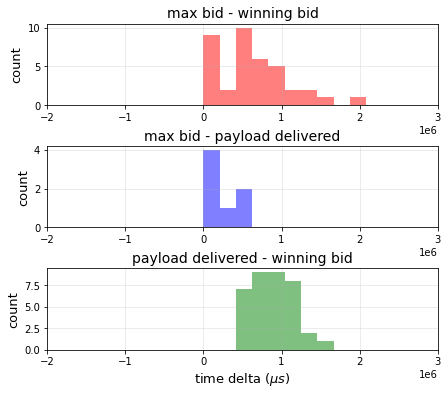

In [18]:
f, axarr = plt.subplots(nrows=3, figsize=(7,6))
cts, bins = np.histogram(delta1[np.where((delta1 >= int(-2e6)) | (delta1 <= int(3e6)))], bins=10)
axarr[0].hist(delta1[np.where((delta1 >= int(-2e6)) | (delta1 <= int(3e6)))], bins=bins, color='r', alpha=0.5)
axarr[1].hist(delta2[np.where((delta2 >= int(-2e6)) | (delta2 <= int(3e6)))], bins=bins, color='b', alpha=0.5)
axarr[2].hist(delta3[np.where((delta3 >= int(-2e6)) | (delta3 <= int(3e6)))], bins=bins, color='g', alpha=0.5)
# ax.set_title('winning bid insertion relative to slot boundary', size=17)
# ax.legend()
for ax in axarr:
    ax.set_xlim(int(-2e6), int(3e6))
    ticks = [int(-2e6),int(-1e6),int(0),int(1e6),int(2e6),int(3e6)]
    ax.set_xticks(ticks)
    ax.set_ylabel('count', size=13)
# for ax in axarr[:-1]:
#     ax.set_xticklabels([])
axarr[-1].set_xlabel('time delta $(\mu s)$', size=13)
axarr[0].set_title('max bid - winning bid', size=14)
axarr[1].set_title('max bid - payload delivered', size=14)
axarr[2].set_title('payload delivered - winning bid', size=14)
plt.subplots_adjust(hspace=0.5)
plt.show()